# Part 1 : Importations et Configuration

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style pour des graphiques professionnels
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Environnement configuré avec succès.")

✅ Environnement configuré avec succès.


# Part 2 : Chargement du Dataset

In [2]:

try:
    # Assurez-vous que le fichier emotions.csv est dans le même dossier
    df = pd.read_csv('emotions.csv')
    
    print("---  Aperçu des 5 premières lignes ---")
    display(df.head())
    
    print("\n---  Informations Techniques ---")
    print(df.info())

except FileNotFoundError:
    print(" Erreur : Le fichier 'emotions.csv' est introuvable. Vérifiez le chemin.")

---  Aperçu des 5 premières lignes ---


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4



---  Informations Techniques ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB
None


# Part 3 : Nettoyage Initial

In [3]:

# 1. Vérification des doublons avant suppression
doublons_avant = df.duplicated().sum()
print(f"🔍 Doublons détectés avant nettoyage : {doublons_avant}")

# 2. Suppression des doublons
df_clean = df.drop_duplicates().copy()

# 3. Vérification des valeurs manquantes
manquants = df_clean.isnull().sum().sum()

# 4. Rapport de nettoyage
print("-" * 30)
print(f"✅ Doublons supprimés : {doublons_avant}")
print(f"✅ Lignes restantes : {len(df_clean)} (sur {len(df)} initiales)")
print(f"✅ Valeurs manquantes restantes : {manquants}")

if manquants == 0 and doublons_avant > 0:
    print("\n Succès : Le dataset est maintenant unique et sans trous.")

🔍 Doublons détectés avant nettoyage : 686
------------------------------
✅ Doublons supprimés : 686
✅ Lignes restantes : 416123 (sur 416809 initiales)
✅ Valeurs manquantes restantes : 0

 Succès : Le dataset est maintenant unique et sans trous.


In [4]:
# Code d'analyse des doublons 

# On cherche toutes les occurrences des doublons (keep=False permet de voir l'original ET la copie)
les_doublons = df[df.duplicated(keep=False)].sort_values(by='text')

print(f"Nombre total de lignes impliquées dans des doublons : {len(les_doublons)}")
print("--- Exemples de doublons trouvés ---")

# On affiche les 10 premiers pour comprendre
display(les_doublons.head(10))

Nombre total de lignes impliquées dans des doublons : 1250
--- Exemples de doublons trouvés ---


,text,label
263174,i actually feel embarrassed for him comments a...,0
344487,i actually feel embarrassed for him comments a...,0
415014,i aint happy im feeling glad,1
247313,i aint happy im feeling glad,1
276596,i also have no particular feeling of patriotis...,1
22787,i also have no particular feeling of patriotis...,1
23711,i also have no particular feeling of patriotis...,2
11508,i also have no particular feeling of patriotis...,2
205033,i also really enjoy spending time at home with...,0
225205,i also really enjoy spending time at home with...,0


# Part 4 : Analyse de la Distribution des Classes

---  Répartition des Émotions (%) ---
label_name
Joy         33.831103
Sadness     29.075297
Anger       13.754347
Fear        11.454306
Love         8.290097
Surprise     3.594851
Name: proportion, dtype: float64


C:\Users\ayoub\AppData\Local\Temp\ipykernel_12952\4166193825.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label_name', data=df_clean, order=df_clean['label_name'].value_counts().index, palette='viridis')


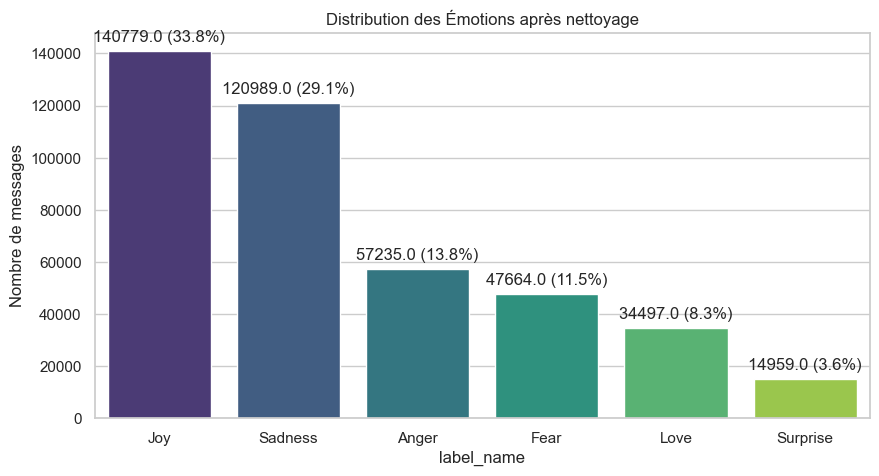

In [5]:

# 1. Création du dictionnaire de mapping (Indispensable pour avoir 'label_name')
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# 2. Application du mapping sur le dataset nettoyé
df_clean['label_name'] = df_clean['label'].map(label_map)

# 3. Calcul des pourcentages
distribution = df_clean['label_name'].value_counts(normalize=True) * 100

print("---  Répartition des Émotions (%) ---")
print(distribution)

# 4. Visualisation
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label_name', data=df_clean, order=df_clean['label_name'].value_counts().index, palette='viridis')

# Ajout des pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/len(df_clean)*100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Distribution des Émotions après nettoyage')
plt.ylabel('Nombre de messages')
plt.show()

# Part 5 : Feature Engineering (Création de Méta-Features)

In [6]:

# import numpy as np

# Fonctions utilitaires
def count_punctuation(text):
    return sum([1 for char in str(text) if char in ["!", "?"]])

def calc_caps_ratio(text):
    text = str(text)
    if len(text) == 0: return 0
    return sum(1 for c in text if c.isupper()) / len(text)

# 1. Création des variables
# On s'assure que la colonne 'text' est bien en string
df_clean['text'] = df_clean['text'].astype(str)

df_clean['text_len'] = df_clean['text'].apply(len)
df_clean['word_count'] = df_clean['text'].apply(lambda x: len(x.split()))
df_clean['caps_ratio'] = df_clean['text'].apply(calc_caps_ratio)
df_clean['punct_count'] = df_clean['text'].apply(count_punctuation)

# 2. Analyse Critique des Features (Pour le rapport "Excellent")
print("---  Statistiques des Nouvelles Features ---")
stats = df_clean[['text_len', 'word_count', 'caps_ratio', 'punct_count']].describe().round(3)
display(stats)

# Petit diagnostic automatique
if df_clean['caps_ratio'].max() == 0:
    print("\n ALERTE : Le ratio de majuscules est de 0 partout.")
else:
    print("\n Info : Les majuscules sont présentes, feature potentiellement utile.")

if df_clean['punct_count'].max() == 0:
    print(" Pas de ponctuation (! ou ?) détectée.")

---  Statistiques des Nouvelles Features ---


,text_len,word_count,caps_ratio,punct_count
count,416123.000,416123.000,416123.0,416123.0
mean,97.103,19.225,0.0,0.0
std,56.176,11.047,0.0,0.0
min,2.000,1.000,0.0,0.0
25%,54.000,11.000,0.0,0.0
50%,86.000,17.000,0.0,0.0
75%,128.000,25.000,0.0,0.0
max,830.000,178.000,0.0,0.0



 ALERTE : Le ratio de majuscules est de 0 partout.
 Pas de ponctuation (! ou ?) détectée.


# Part 6 : Visualisation des Features par Émotion

C:\Users\ayoub\AppData\Local\Temp\ipykernel_12952\1372793887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='label_name', y='text_len', data=df_clean, palette='viridis', showfliers=False)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_12952\1372793887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='label_name', y='word_count', data=df_clean, palette='viridis', showfliers=False)


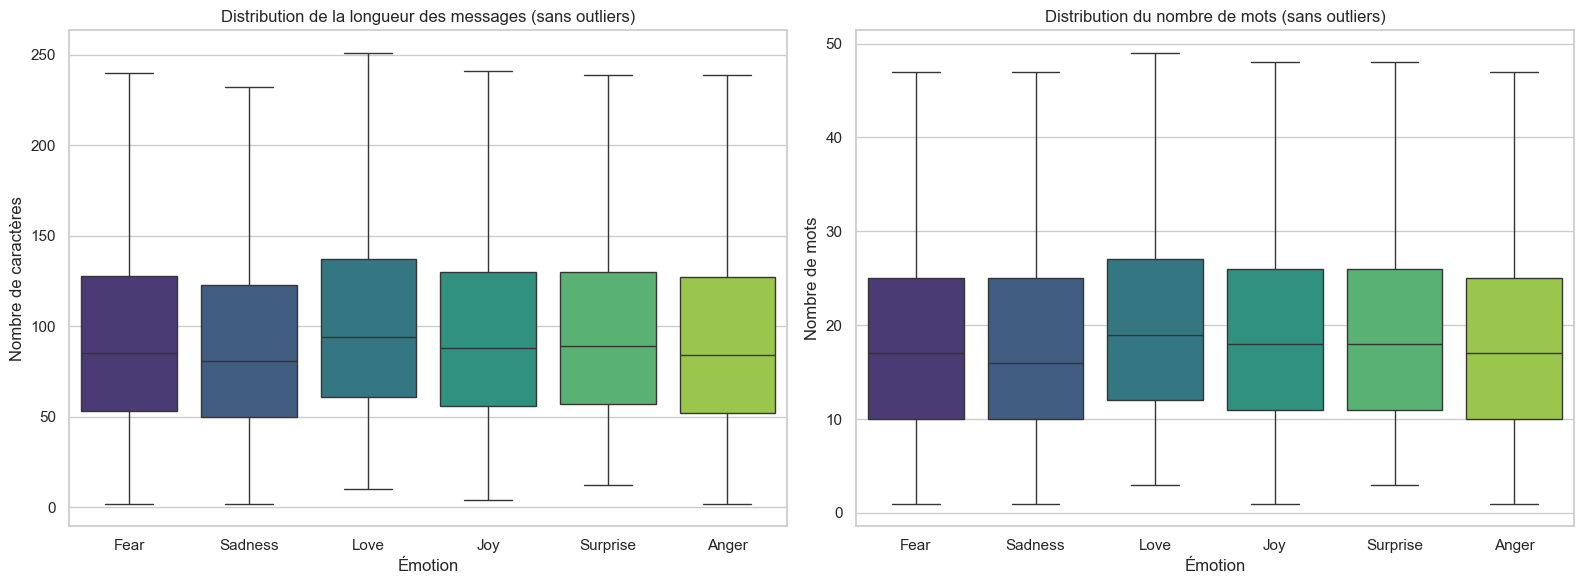

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Longueur des textes
sns.boxplot(ax=axes[0], x='label_name', y='text_len', data=df_clean, palette='viridis', showfliers=False)
axes[0].set_title('Distribution de la longueur des messages (sans outliers)')
axes[0].set_ylabel('Nombre de caractères')
axes[0].set_xlabel('Émotion')

# Graphique 2 : Nombre de mots
sns.boxplot(ax=axes[1], x='label_name', y='word_count', data=df_clean, palette='viridis', showfliers=False)
axes[1].set_title('Distribution du nombre de mots (sans outliers)')
axes[1].set_ylabel('Nombre de mots')
axes[1].set_xlabel('Émotion')

plt.tight_layout()
plt.show()

# Part 7 : Suppression des textes trop courts (Bruit)

In [8]:


# Seuil : On supprime les messages de moins de 3 caractères ou moins de 2 mots
seuil_len = 3
mask_bruit = df_clean['text_len'] < seuil_len
nb_bruit = mask_bruit.sum()

print(f" Suppression de {nb_bruit} messages considérés comme du bruit (longueur < {seuil_len}).")
print("Exemples de bruit :")
print(df_clean[mask_bruit]['text'].head(5).values)

# Filtrage
df_final = df_clean[~mask_bruit].copy()

print(f"\n✅ Taille finale du dataset prêt pour le ML : {len(df_final)} lignes.")

 Suppression de 3 messages considérés comme du bruit (longueur < 3).
Exemples de bruit :
['in' 'in' 'in']

✅ Taille finale du dataset prêt pour le ML : 416120 lignes.


# Part 8 : Analyse Sémantique par Nuages de Mots (WordClouds)

 Véridication : Peut prendre du temps car génération des WordClouds en cours... 


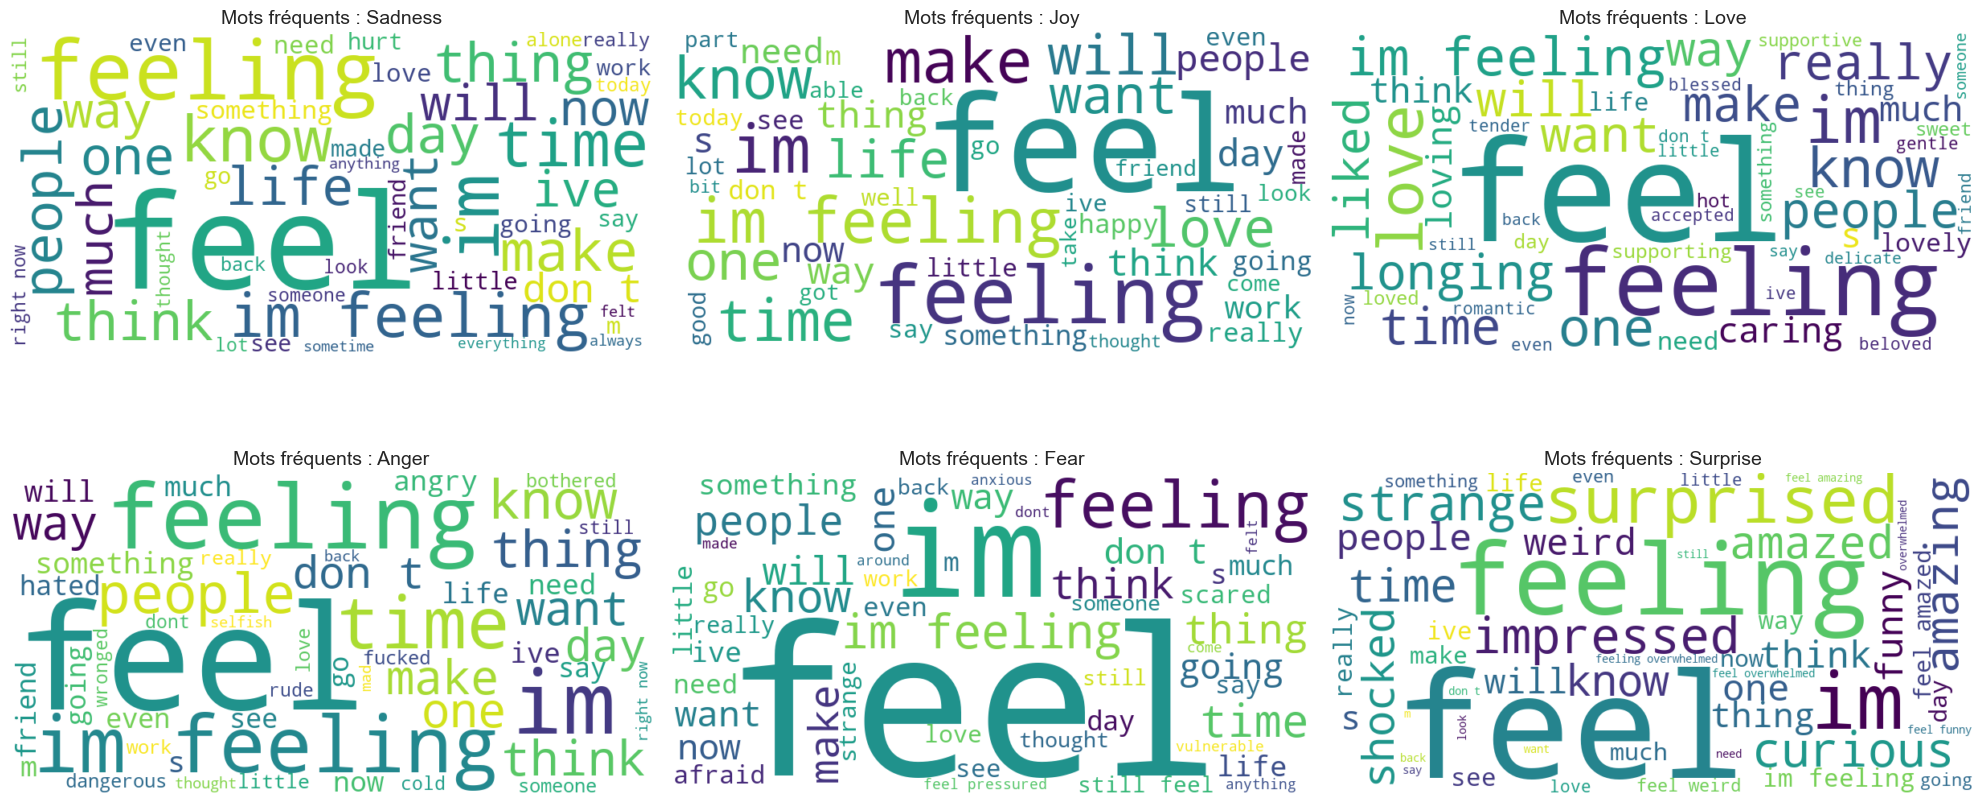

In [9]:

from wordcloud import WordCloud

# Configuration de la grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Liste des émotions pour l'itération
emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

print(" Véridication : Peut prendre du temps car génération des WordClouds en cours... ")

for i, emotion in enumerate(emotions):
    # On filtre le texte pour l'émotion courante
    text_data = " ".join(df_final[df_final['label_name'] == emotion]['text'].values)
    
    # Création du WordCloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=50).generate(text_data)
    
    # Affichage
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Mots fréquents : {emotion}', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Part 9 : Matrice de Corrélation des Features Numériques

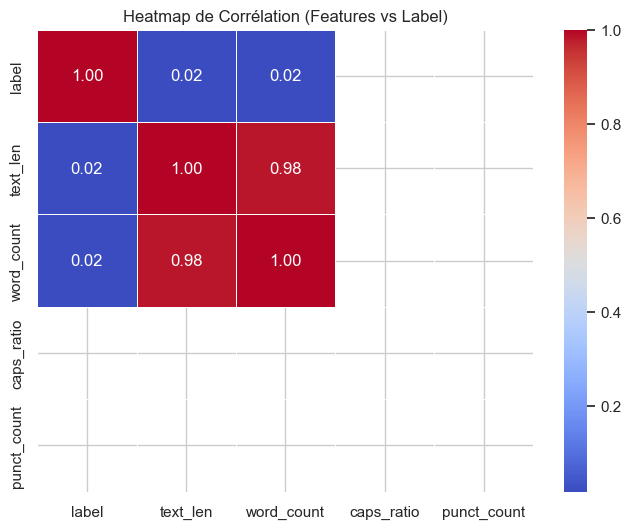

 Analyse : Si la corrélation entre 'label' et 'text_len' est faible (proche de 0),
cela confirme que la longueur seule ne suffit pas à prédire l'émotion.
Nous aurons donc impérativement besoin du NLP (Analyse du texte) à l'étape suivante.


In [10]:


# Sélection des colonnes numériques uniquement
features_num = df_final[['label', 'text_len', 'word_count', 'caps_ratio', 'punct_count']]

# Calcul de la matrice de corrélation
corr_matrix = features_num.corr()

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Corrélation (Features vs Label)')
plt.show()

print(" Analyse : Si la corrélation entre 'label' et 'text_len' est faible (proche de 0),")
print("cela confirme que la longueur seule ne suffit pas à prédire l'émotion.")
print("Nous aurons donc impérativement besoin du NLP (Analyse du texte) à l'étape suivante.")

# Cellule 10 : Exportation du Dataset Nettoyé

In [ ]:

output_file = 'emotions_cleaned_features.csv'

# On sauvegarde sans l'index (pour ne pas créer une colonne 'Unnamed: 0')
df_final.to_csv(output_file, index=False)


print(f"✅ Succès ! Fichier sauvegardé sous : {output_file}")
print(f" Dimensions finales : {df_final.shape}")
print("Prêt pour le Notebook 2 : Pipeline & Entraînement des Modèles.")





✅ Succès ! Fichier sauvegardé sous : emotions_cleaned_features.csv
 Dimensions finales : (416120, 7)
Prêt pour le Notebook 2 : Pipeline & Entraînement des Modèles.
